## Dash components
---
- Core Components: dcc
- HTML Components: html 

Old way to import:
```python 
import dash_core_components as dcc, import dash_html_components as html
```

New way to import:
```python 
from dash Dash, import html, dcc
```

### 1 HTML Components:
- Component for every HTML tag
    - .H1()
    - .P()
    - .Div()
- Keywords arguments describe the HTML attributes like
    - style
    - className
    - id

### 2 Core Components
- Higher-level componentse that are interactive and generated with JS, HTML, CSS through the React.js library
- Function: Creaing a slider, input area, check items, datepicker,...
    - dcc.Dropdown() - create a drop down as dictionary!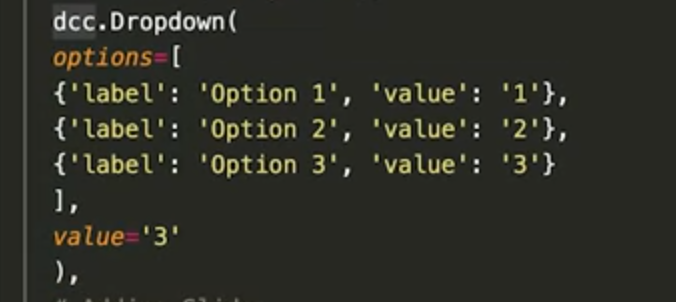
    - dcc.Slider() - create a slider 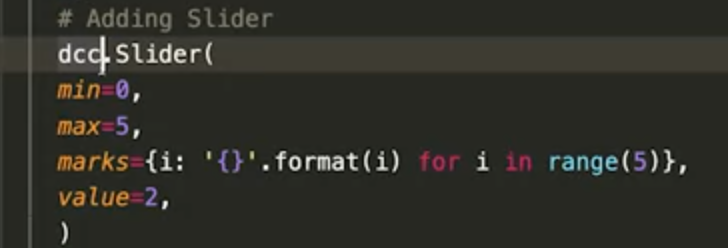

**Example**

In [ ]:
# Import required packages
import pandas as pd
import plotly.express as px
from dash import Dash, html, dcc, callback, Output, Input

In [ ]:
app = Dash()

In [ ]:
app.layout = html.Div([
    html.H1('Hello World!!!'),
    html.Div('Dash - A data product development framework from plotly company')
])

In [ ]:
if __name__ =='__main__':
    app.run_server(port = 4050)

**Exercise**

In [ ]:
# Read the airline data into pandas dataframe
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

# Randomly sample 500 data points. Setting the random state to be 42 so that we get same result.
data = airline_data.sample(n=500, random_state=42)

# Pie Chart Creation
fig = px.pie(data, values='Flights', 
             names='DistanceGroup', 
             title='Distance group proportion by flights')

# Create a dash application
app = Dash(__name__)

# Get the layout of the application and adjust it.
# Create an outer division using html.Div and add title to the dashboard using html.H1 component
# Add description about the graph using HTML P (paragraph) component
# Finally, add graph component.

app.layout = html.Div(
    [html.H1('Airline Dashboard', style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),
     html.P('Proportion of distance group (250 mile distance interval group) by flights.', style={'textAlign':'center', 'color': '#F57241'}),
     dcc.Graph(figure=fig),
])

# Run the application                   
if __name__ == '__main__':
    app.run_server(port=4050)

### 3 Callbacks function
- Callback function is a python function that are automatically called by a Dash whenever an input components's property changes.
- Decorated with `@app.callback`
- Whenever there is a change in the input component value, callback function wrapped by the decorator is called followed by the update to the output component children in the application layout. 

```python
@app.callback(Output, Input)
def callback_function:
    ...
    ....
    ...
    return some_result
```

In [ ]:
# Import required packages
import pandas as pd
import plotly.express as px
from dash import Dash, html, dcc, callback, Output, Input

In [ ]:
# Read the data
airline_data = pd.read_csv(
    "airline_data.csv",
    encoding="ISO-8859-1",
    dtype={
        "Div1Airport": str,
        "Div1TailNum": str,
        "Div2Airport": str,
        "Div2TailNum": str,
    },
)

In [ ]:
app = Dash(__name__)

# Define colors dictionary
colors = {"text": "#503D36"}

# Design Dash app layout
app.layout = html.Div(
    [
        html.H1(
            "Airline Dashboard",
            style={"textAlign": "center", "color": colors["text"], "font-size": 40},
        ),
        html.Div(
            [
                "Input:",
                dcc.Input(
                    id="input-yr",
                    value="2010",
                    type="number",
                    style={"height": "50px", "font-size": 35},
                ),
            ],
            style={"font-size": 40},
        ),
        html.Br(),
        html.Br(),
        html.Div(dcc.Graph(id="bar-plot")),
    ]
)

In [ ]:
@app.callback(
    Output(component_id="bar-plot", component_property="figure"),
    Input(component_id="input-yr", component_property="value"),
)

def get_graph(entered_year):
    # Select data
    df = airline_data[airline_data["Year"] == int(entered_year)]
    
    # Top 10 airline carrier in terms of numbers of flights
    g1 = df.groupby("Reporting_Airline")["Flights"].sum().largest(10).reset_index()
    
    # Plot the graph
    fig1 = px.bar(
        data_frame=g1,
        x="Reporting_Airline",
        y="Flights",
        title="Top 10 airline carriers in year " + str(entered_year) + " in terms of number of flights",
    )
    fig1.update_layout()
    return fig1

# Run the application                   
if __name__ == '__main__':
    app.run_server(port=4050)

In [ ]:
# Import required packages
import pandas as pd
import plotly.express as px
from dash import Dash, html, dcc, callback, Output, Input

# Read the data
airline_data = pd.read_csv(
    "airline_data.csv",
    encoding="ISO-8859-1",
    dtype={
        "Div1Airport": str,
        "Div1TailNum": str,
        "Div2Airport": str,
        "Div2TailNum": str,
    },
)

app = Dash(__name__)

# Define colors dictionary
colors = {"text": "#503D36"}

# Design Dash app layout
app.layout = html.Div(
    [
        html.H1(
            "Airline Dashboard",
            style={"textAlign": "center", "color": colors["text"], "font-size": 40},
        ),
        html.Div(
            [
                "Input:",
                dcc.Input(
                    id="input-yr",
                    value="2010",
                    type="number",
                    style={"height": "50px", "font-size": 35},
                ),
            ],
            style={"font-size": 40},
        ),
        html.Br(),
        html.Br(),
        html.Div(dcc.Graph(id="bar-plot")),
    ]
)

@app.callback(
    Output(component_id="bar-plot", component_property="figure"),
    Input(component_id="input-yr", component_property="value"),
)

def get_graph(entered_year):
    # Select data
    df = airline_data[airline_data["Year"] == int(entered_year)]
    
    # Top 10 airline carrier in terms of numbers of flights
    g1 = df.groupby("Reporting_Airline")["Flights"].sum().largest(10).reset_index()
    
    # Plot the graph
    fig1 = px.bar(
        data_frame=g1,
        x="Reporting_Airline",
        y="Flights",
        title="Top 10 airline carriers in year " + str(entered_year) + " in terms of number of flights",
    )
    fig1.update_layout()
    return fig1

# Run the application                   
if __name__ == '__main__':
    app.run_server(port=4050)